<a href="https://colab.research.google.com/github/isaacenyogoi/first-code/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup the working environment (Adapted from course page)


In [0]:
from google.colab import files

import platform, sys
python_version=platform.python_version()
from distutils.version import LooseVersion, StrictVersion

if ( LooseVersion(python_version) < LooseVersion("3.0.0")):
    print("Python3 is needed!");
    print("How to fix: Runtime/Change_runtime_type/Python 3");
    sys.exit()
    
try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics
    from dolfin import *; from mshr import *
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display, update_display;import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil
import numpy as np 


dolfin_version = dolfin.__version__
print ('dolfin version:', dolfin_version)

!rm -rf * # clean up all files
# Useful commands
# Remove an empty folder      : os.rmdir("my_results")
# Remove a folder with files  : shutil.rmtree("results")
# Make a folder               : os.mkdir("my_results")
# Runtime/Change_runtime_type/Python3

In [0]:
plt.style.use('classic')
from ufl import nabla_div
from ufl import nabla_grad

Stokes equation;
\begin{equation}
\begin{aligned}
-\nu\Delta {u} + \nabla p  &= {f}  &\text{in}~ \Omega,\\
\nabla \cdot {u} & = 0 &\text{in}~ \Omega.\\
{u} = {g}_{D}~ \mbox{on}~ \partial \Omega_{D}, -p\vec{n} + \nu \nabla {u} \cdot {n} &= {g}_{N}~ \mbox{on}~ \partial \Omega _{N}. 
\end{aligned}
\end{equation}
Weak formulation; \\
Find $(u,p) \in (V\times Q)$ such that \\
\begin{equation}
a((u,p),(v,q)) = L((v,q)),
\end{equation}
where
\begin{equation}
a((u,p),(v,q)) = \int_\Omega (\nu\nabla u\cdot \nabla v - p \nabla\cdot v + q\nabla \cdot u ) ~\text{d}x,
\end{equation}
and 
\begin{equation}
L((v,q)) = \int_\Omega fv ~\text{d}x + \int_{\partial \Omega_N} gv ~\text{d}s.
\end{equation}

1. Mixed formulation using TaylorHood elements. P1-P2 elements for pressure and velocity respectively. 

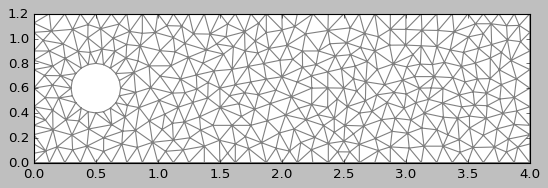

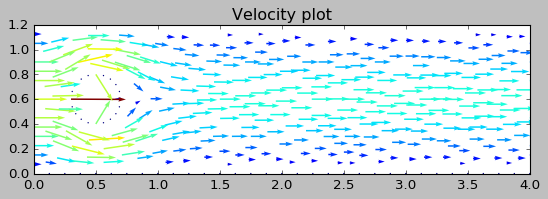

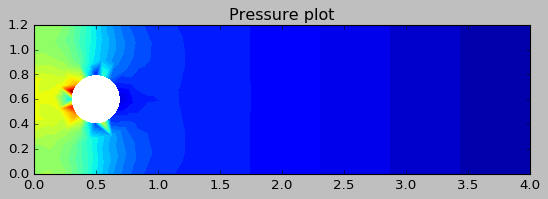

In [0]:
plt.style.use('classic')
# Create mesh and define function space
XMIN = 0.; XMAX = 4; YMIN = 0; YMAX = 1.2; G = [XMIN, XMAX, YMIN, YMAX]; 
mresolution=20 # Geometry and mesh
mesh = generate_mesh(Rectangle(Point(G[0], G[2]), Point(G[1], G[3])) - \
                     Circle(Point(0.5, 0.5*(YMIN+YMAX)), .2, mresolution), \
                     mresolution)
plot(mesh);plt.show()
P2 = VectorElement('Lagrange', 'triangle', 2)
P1 = FiniteElement('Lagrange', 'triangle', 1)
TH = P2 * P1
W = FunctionSpace(mesh, TH)
def boundary(x, on_boundary):
    return on_boundary 

inflow  = 'near(x[0], 0)'
outflow = 'near(x[0], 4)'
walls   = 'near(x[1], 0) || near(x[1], 1.2)'
obstacle = 'on_boundary && x[0]>0.3 && x[0]< 0.7 && x[1]> 0.4 && x[1]< 0.8'

# Define boundary conditions (Prescribe nothing on the outlet). 
bc_1 = DirichletBC(W.sub(0), Constant((0,0)), walls)
bc_2 = DirichletBC(W.sub(0), Constant((0,0)), obstacle)
bc_3 = DirichletBC(W.sub(0), Expression(('4*x[1]*(1.2-x[1])/(1.2*1.2)','0'),\
                                        degree = 2), inflow)
bcu = [bc_1,bc_2,bc_3]
# Define variational formulation
(v, q) = TestFunctions(W);(u, p) = TrialFunctions(W)
f = Constant((0,0));alpha = Constant(0.1)
a = alpha*inner(nabla_grad(u), nabla_grad(v))*dx - p*nabla_div(v)*dx + \
nabla_div(u)*q*dx 
L = dot(f,v)*dx 
# Compute solution
w = Function(W)
solve(a == L,w,bcu);(u, p) = w.split(True)
# Plot velocity
plot(u, title='Velocity plot');plt.show()
#Plot pressure
plot(p, title='Pressure plot');plt.show()



2. Mixed formulation using  P1-P1 elements for both  pressure and velocity. 

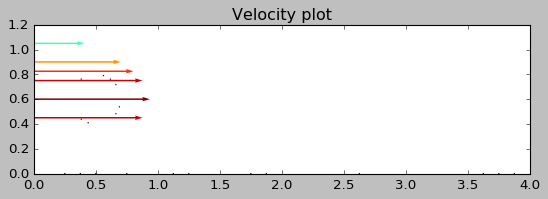

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1203: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1205: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]


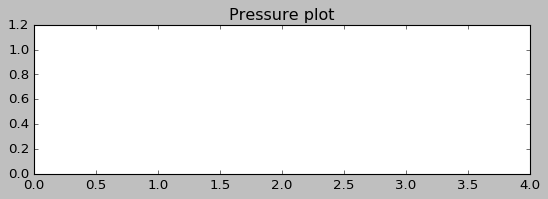

In [0]:
plt.style.use('classic')
# Create mesh and define function space
XMIN = 0.; XMAX = 4; YMIN = 0; YMAX = 1.2; G = [XMIN, XMAX, YMIN, YMAX]; 
mresolution=20 # Geometry and mesh
mesh = generate_mesh(Rectangle(Point(G[0], G[2]), Point(G[1], G[3])) - \
                     Circle(Point(0.5, 0.5*(YMIN+YMAX)), .2, mresolution), \
                     mresolution)

P2 = VectorElement('Lagrange', 'triangle', 1)
P1 = FiniteElement('Lagrange', 'triangle', 1)
TH = P2 * P1
W = FunctionSpace(mesh, TH)
def boundary(x, on_boundary):
    return on_boundary 

inflow  = 'near(x[0], 0)'
outflow = 'near(x[0], 4)'
walls   = 'near(x[1], 0) || near(x[1], 1.2)'
obstacle = 'on_boundary && x[0]>0.3 && x[0]< 0.7 && x[1]> 0.4 && x[1]< 0.8'

# Define boundary conditions
bc_1 = DirichletBC(W.sub(0), Constant((0,0)), walls)
bc_2 = DirichletBC(W.sub(0), Constant((0,0)), obstacle)
bc_3 = DirichletBC(W.sub(0), Expression(('4*x[1]*(1.2-x[1])/(1.2*1.2)','0'),\
                                        degree = 2), inflow)
bcu = [bc_1,bc_2,bc_3]
# Define variational formulation
(v, q) = TestFunctions(W);(u, p) = TrialFunctions(W)
f = Constant((0,0));alpha = Constant(0.1)
a = alpha*inner(nabla_grad(u), nabla_grad(v))*dx - p*nabla_div(v)*dx + \
nabla_div(u)*q*dx 
L = dot(f,v)*dx 
# Compute solution
w = Function(W)
solve(a == L,w,bcu);(u, p) = w.split(True)
# Plot velocity
plot(u, title='Velocity plot');plt.show()
#Plot pressure
plot(p, title='Pressure plot');plt.show()


3. . Mixed formulation using P1-P1 elements for both pressure and velocity with stabilization. 
Weak formulation; \\
Find $(u,p) \in (V\times Q)$ such that \\
\begin{equation}
a((u,p),(v,q)) = L((v,q)),
\end{equation}
where
\begin{equation}
a((u,p),(v,q)) = \int_\Omega (\nu\nabla u\cdot \nabla v - p \nabla\cdot v + q\nabla \cdot u + \underbrace{\delta \nabla q \cdot \nabla p}_{stabilization ~term}  ) ~\text{d}x,
\end{equation}
and 
\begin{equation}
L((v,q)) = \int_\Omega (fv  + \underbrace{\delta \nabla q \cdot f}_{stabilization ~term} )~\text{d}x + \int_{\partial \Omega_N} gv ~\text{d}s.
\end{equation}
$ \delta = \beta h^2, \beta $ = Constant and $h = $ mesh cell size. 


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


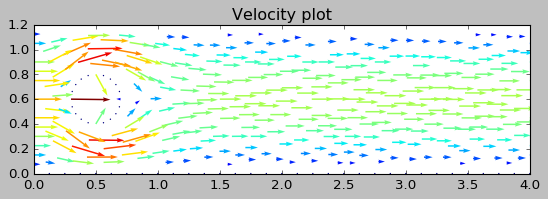

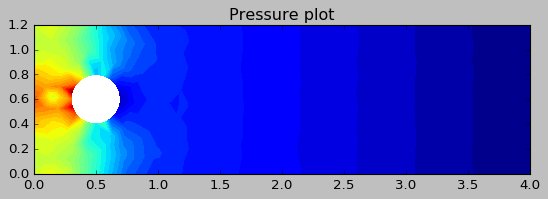

In [0]:
plt.style.use('classic')
# Create mesh and define function space
XMIN = 0.; XMAX = 4; YMIN = 0; YMAX = 1.2; G = [XMIN, XMAX, YMIN, YMAX]; 
mresolution=20 # Geometry and mesh
mesh = generate_mesh(Rectangle(Point(G[0], G[2]), Point(G[1], G[3])) - \
                     Circle(Point(0.5, 0.5*(YMIN+YMAX)), .2, mresolution), \
                     mresolution)

P2 = VectorElement('Lagrange', 'triangle', 1)
P1 = FiniteElement('Lagrange', 'triangle', 1)
TH = P2 * P1
W = FunctionSpace(mesh, TH)
def boundary(x, on_boundary):
    return on_boundary 

inflow  = 'near(x[0], 0)'
outflow = 'near(x[0], 4)'
walls   = 'near(x[1], 0) || near(x[1], 1.2)'
obstacle = 'on_boundary && x[0]>0.3 && x[0]< 0.7 && x[1]> 0.4 && x[1]< 0.8'

# Define boundary conditions
bc_1 = DirichletBC(W.sub(0), Constant((0,0)), walls)
bc_2 = DirichletBC(W.sub(0), Constant((0,0)), obstacle)
bc_3 = DirichletBC(W.sub(0), Expression(('4*x[1]*(1.2-x[1])/(1.2*1.2)','0'),\
                                        degree = 2), inflow)
bcu = [bc_1,bc_2,bc_3]
# Define variational formulation
(v, q) = TestFunctions(W);(u, p) = TrialFunctions(W)
f = Constant((0,0))
alpha = Constant(0.1);h = CellDiameter(mesh);beta  = 0.2;delta = beta*h*h
a = alpha*inner(nabla_grad(u), nabla_grad(v))*dx - p*nabla_div(v)*dx + \
nabla_div(u)*q*dx + \
delta*inner(nabla_grad(q), nabla_grad(p))*dx #stabilixation term
L = dot(f,v)*dx + \
delta*dot(grad(q),f)*dx #stabilixation term
# Compute solution
w = Function(W)
solve(a == L,w,bcu); (u, p) = w.split(True)
# Plot velocity
plot(u, title='Velocity plot'); plt.show()
#Plot pressure
plot(p, title='Pressure plot');plt.show()
